In [2]:
from utils import Args
from training.noncvx_network_train import train_model
from solve_problem import solve_problem
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

In [5]:
data = np.load("./results/learned_plain/planted_plain/form_exact/trial__n200__d20__w0__k1__X0__stdev0.0__sample5/dis_abs.npy")
data.min()

0.03599077138795314

In [2]:
data = np.load("/Users/alexandercai/Developer/ml/recovery/results/learned_skip/planted_linear/form_gd/trial__n400__d100__w1__X0__stdev0.0__sample5__actsigmoid/test_err.npy")

In [8]:
A = np.random.randn(3, 5)
np.allclose(np.linalg.pinv(A), A.T @ np.linalg.inv(A @ A.T))

True

In [3]:
data.shape

(40, 10, 5)

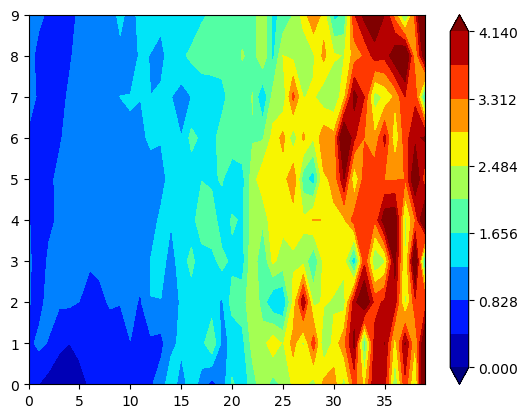

In [29]:
plt.contourf(data.mean(axis=2).T, cmap="jet", levels=np.linspace(0, np.quantile(data, 0.9), 11), extend="both")
plt.colorbar()
plt.savefig("test_err_sigmoid.png")
plt.xlabel("n")
plt.show()

In [50]:
args = Args("linear", "skip", "gd", lr=0.0002, epochs=800)

Arguments:
planted         linear
learned         skip
form            gd
n               100
d               50
k               1
sigma           0.0
tol             0.0001
optw            1
optx            0
cubic           False
whiten          False
seed            42
sample          5
quiet           False
save_details    False
save_folder     ./results/
cmap            jet
epochs          800
lr              0.0002
beta            1e-06
activation      relu



In [3]:
data, metrics = solve_problem(100, 10, args)

(100, 10)


In [53]:
data_gd, metrics_gd = train_model(200, 10, 0, args)

Train error: 0.000, Test error: 0.002: 100%|██████████| 800/800 [00:03<00:00, 234.48it/s]


In [11]:
def load_dir(base_path: str):
    data = {}
    for f in os.listdir(base_path):
        if f.endswith(".npy"):
            data[f[:-4]] = np.load(base_path + f)
    return data

In [12]:
base_path = "./results/learned_skip/planted_linear/form_{}/trial__n120__d50__w1__k1__X0__stdev0.0__sample5/"
data_convex = load_dir(base_path.format("exact"))
data_gd = load_dir(base_path.format("gd"))

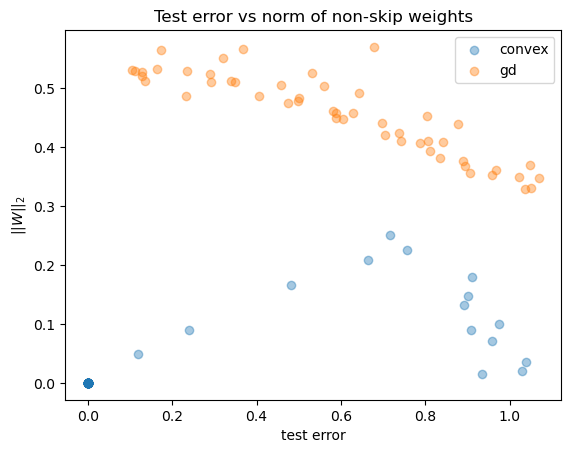

In [15]:
prop = "other_norm"
mask = ~np.isnan(data_convex["test_err"].mean(axis=2))
def prepare(data):
    return data.mean(axis=2)[mask].flatten()
plt.scatter(prepare(data_convex["test_err"]), prepare(data_convex[prop]), alpha=0.4, label="convex")
plt.scatter(prepare(data_gd['test_err']), prepare(data_gd[prop]), alpha=0.4, label="gd")

descriptions = {
    "dis_abs": "absolute distance from learned weights to planted weights",
    "other_norm": "norm of non-skip weights",
}

formulation = {
    "dis_abs": r"$||{\hat{w}}^{skip} - w^{skip}||_2$",
    "other_norm": r"$||W||_2$",
}

plt.title("Test error vs " + descriptions[prop])
plt.xlabel("test error")
plt.ylabel(formulation[prop])
plt.legend()
os.makedirs("./plots", exist_ok=True)
plt.savefig(f"./plots/test_err_vs_{prop}.png")
plt.show()